## b)
directly minimize the objective L without any sparsity-inducing regularization/
constraint. Plot the value of log(L) vs. #steps throughout the training, and use another
figure to plot how the value of each element in W is changing throughout the training. From
your result, is W converging to an optimal solution? Is W converging to a sparse solution?

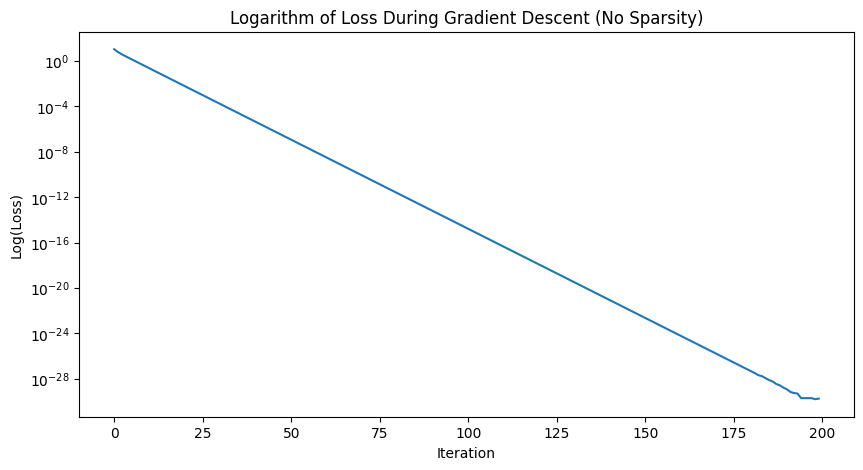

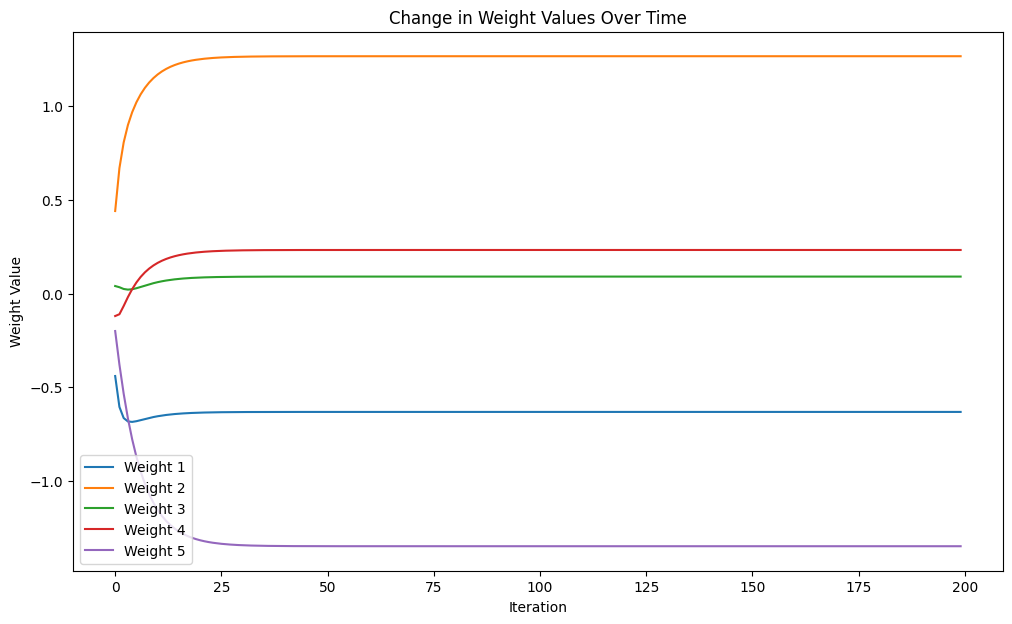

[[-0.63143255]
 [ 1.26564673]
 [ 0.09040334]
 [ 0.23226704]
 [-1.34770515]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points and targets
X = np.array([
    [-2, 2, 1, -1, -1],
    [-2, 1, -2, 0, 1],
    [1, 0, -2, 2, -1]
])
y = np.array([5, 1, 1])

# Initial weight vector without sparsity constraint
W_no_sparse = np.zeros((5, 1))

# Learning rate
mu = 0.02

# Function to compute the gradient of the loss
def compute_gradient(X, y, W):
    residuals = X.dot(W) - y.reshape(-1, 1)  # Reshape y to column vector
    gradient = 2 * X.T.dot(residuals)
    return gradient

# Track loss and weight changes over iterations
losses = []
weight_history = np.zeros((200, 5))

# Run gradient descent for 200 steps without sparsity constraint
for step in range(200):
    gradient = compute_gradient(X, y, W_no_sparse)
    W_no_sparse -= mu * gradient  # Update step
    loss = np.sum((X.dot(W_no_sparse) - y.reshape(-1, 1))**2)
    losses.append(loss)
    weight_history[step, :] = W_no_sparse.ravel()  # Record weight history

# Plotting the log of the loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.yscale('log')
plt.title('Logarithm of Loss During Gradient Descent (No Sparsity)')
plt.xlabel('Iteration')
plt.ylabel('Log(Loss)')
plt.show()

# Plotting changes in each weight
plt.figure(figsize=(12, 7))
for i in range(5):
    plt.plot(weight_history[:, i], label=f'Weight {i+1}')
plt.title('Change in Weight Values Over Time')
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.legend()
plt.show()

# pring weight
print(W_no_sparse)


## c)
Since we have the knowledge that the ground-truth weight should have ||W||0 ≤ 2, we
can apply projected gradient descent to enforce this sparse constraint. Redo the optimization
process in (b), this time prune the elements in W after every gradient descent step to ensure
||Wl||0 ≤ 2. Plot the value of log(L) throughout the training, and use another figure to plot
the value of each element in W in each step. From your result, is W converging to an optimal
solution? Is W converging to a sparse solution?

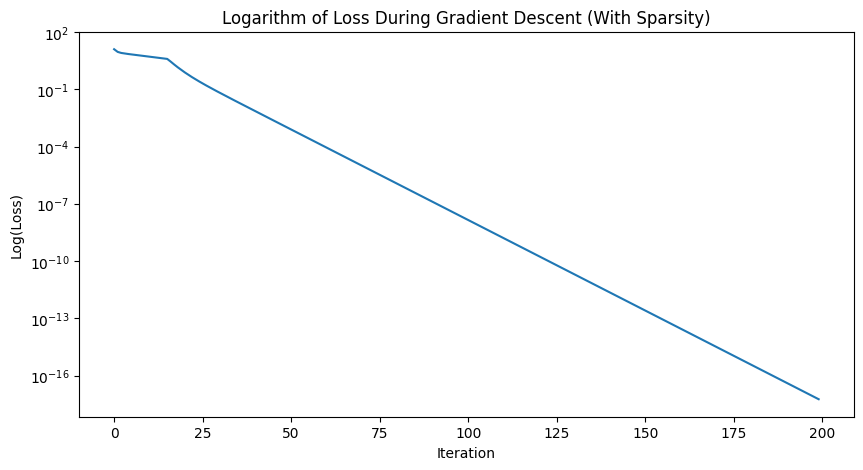

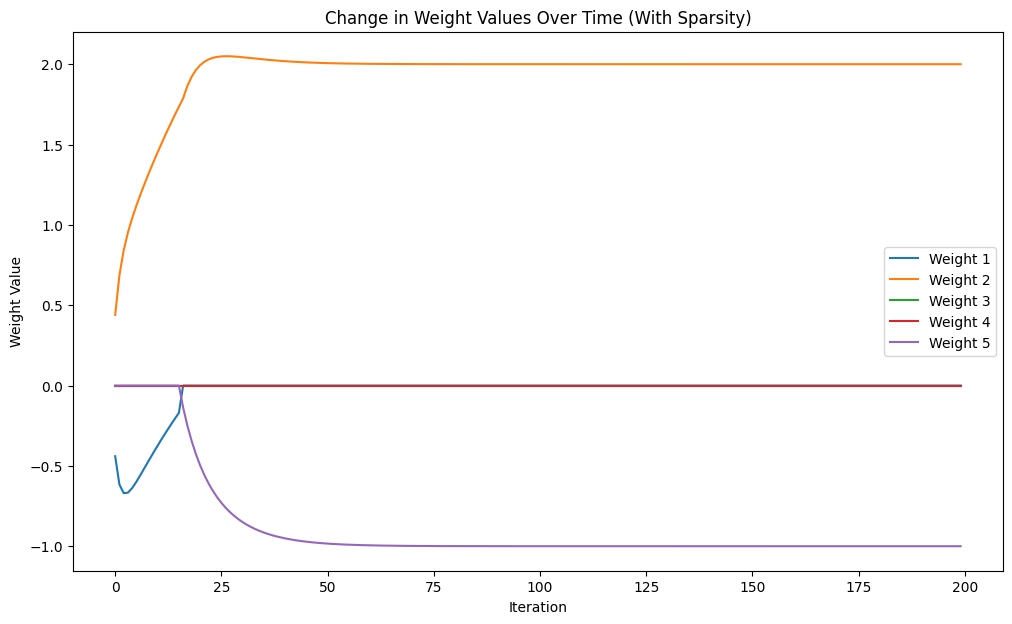

[[ 0.]
 [ 2.]
 [ 0.]
 [ 0.]
 [-1.]]


In [3]:
# Initial weight vector with sparsity constraint
W_sparse = np.zeros((5, 1))

# Learning rate
mu = 0.02

# Function to compute the gradient of the loss
def compute_gradient(X, y, W):
    residuals = X.dot(W) - y.reshape(-1, 1)  # Reshape y to column vector
    gradient = 2 * X.T.dot(residuals)
    return gradient

# Function to enforce sparsity constraint by zeroing all but the two largest weights
def apply_sparsity(W):
    if np.count_nonzero(W) > 2:
        # Get the indices that would sort the array, then set all but the two largest to zero
        sorted_indices = np.argsort(-np.abs(W), axis=0)
        largest_indices = sorted_indices[:2]
        W[sorted_indices[2:]] = 0
    return W

# Track loss and weight changes over iterations
losses_sparse = []
weight_history_sparse = np.zeros((200, 5))

# Run gradient descent for 200 steps with sparsity constraint
for step in range(200):
    gradient = compute_gradient(X, y, W_sparse)
    W_sparse -= mu * gradient  # Update step
    W_sparse = apply_sparsity(W_sparse)  # Enforce sparsity
    loss = np.sum((X.dot(W_sparse) - y.reshape(-1, 1))**2)
    losses_sparse.append(loss)
    weight_history_sparse[step, :] = W_sparse.ravel()  # Record weight history

# Plotting the log of the loss with sparsity
plt.figure(figsize=(10, 5))
plt.plot(losses_sparse)
plt.yscale('log')
plt.title('Logarithm of Loss During Gradient Descent (With Sparsity)')
plt.xlabel('Iteration')
plt.ylabel('Log(Loss)')
plt.show()

# Plotting changes in each weight with sparsity
plt.figure(figsize=(12, 7))
for i in range(5):
    plt.plot(weight_history_sparse[:, i], label=f'Weight {i+1}')
plt.title('Change in Weight Values Over Time (With Sparsity)')
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.legend()
plt.show()

# pring weight
print(W_sparse)
#

## d)
In this problem we apply ℓ1 regularization to induce the sparse solution. The minimization
objective therefore changes to L + λ||W||1. Please use full-batch gradient descent to minimize
this objective, with λ = {0.2, 0.5, 1.0, 2.0} respectively. For each case, plot the value of log(L)
throughout the training, and use another figure to plot the value of each element in W in each
step. From your result, comment on the convergence performance under different λ.

Final weights for λ = 0.2: [-0.42765838  1.40039097 -0.02255693  0.00242927 -1.31989615]
Final weights for λ = 0.5: [-2.58019249e-01  1.60493640e+00 -2.63479728e-03 -1.51292528e-04
 -1.14368882e+00]
Final weights for λ = 1.0: [-0.01681012  1.87968662 -0.00459613  0.00962438 -0.89397687]
Final weights for λ = 2.0: [-0.06225652  1.83682067  0.02951797  0.00614244 -0.72188959]


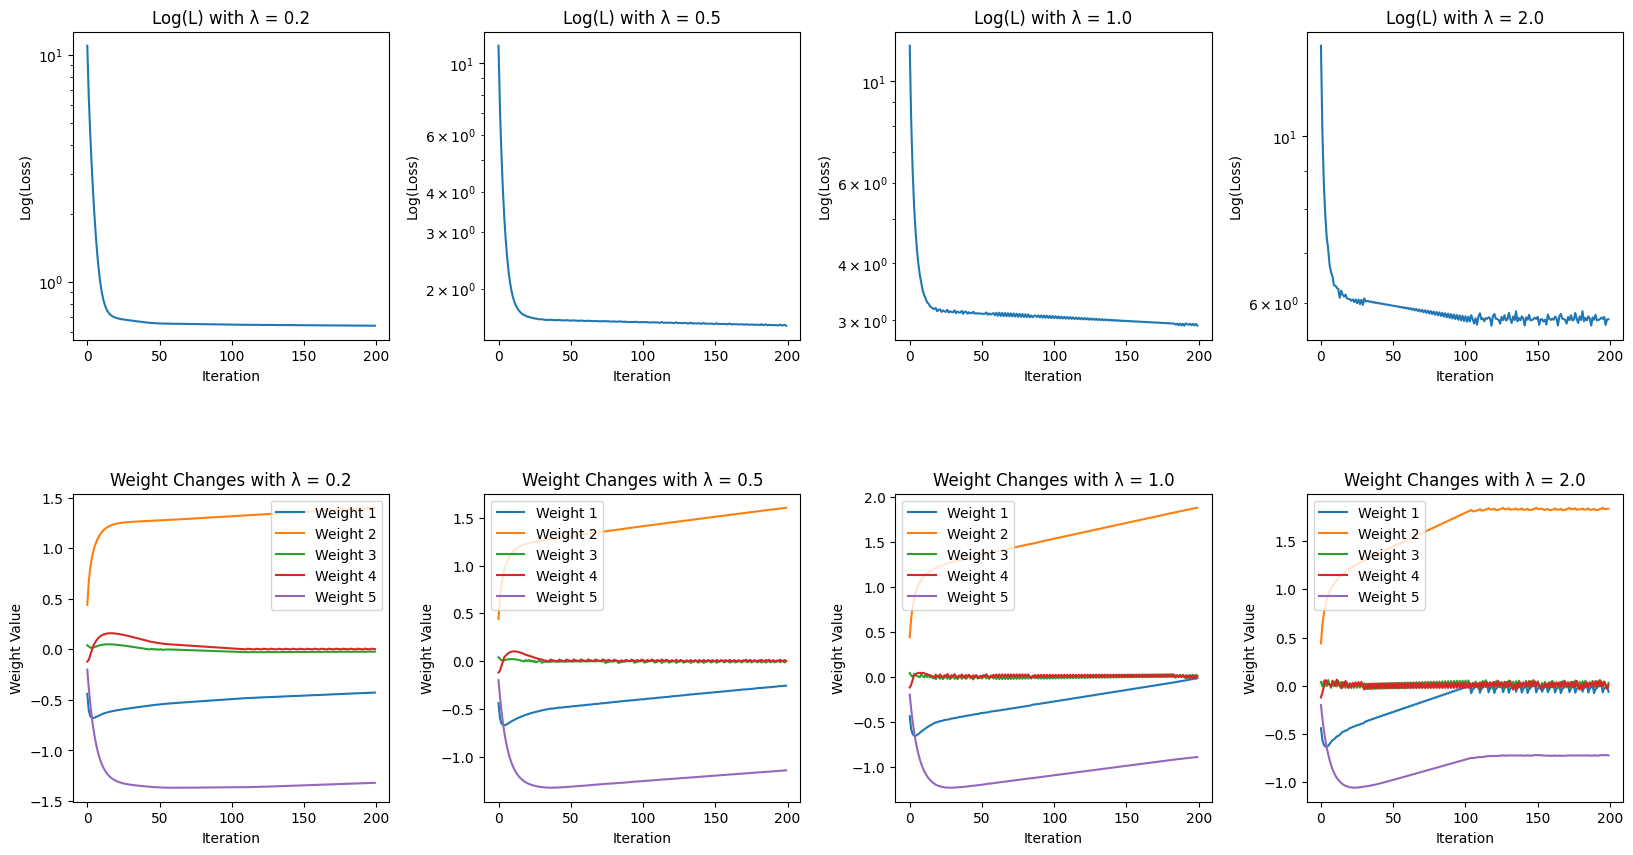

In [5]:
# Learning rate
mu = 0.02

# Define the regularization strengths
lambdas = [0.2, 0.5, 1.0, 2.0]

# Function to compute the gradient of the loss including L1 regularization
def compute_l1_gradient(X, y, W, lambda_):
    residuals = X.dot(W) - y.reshape(-1, 1)
    gradient = 2 * X.T.dot(residuals) + lambda_ * np.sign(W)
    return gradient

# Prepare to plot
fig, axes = plt.subplots(2, len(lambdas), figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Perform gradient descent for each lambda
for index, lambda_ in enumerate(lambdas):
    W_l1 = np.zeros((5, 1))
    losses_l1 = []
    weight_history_l1 = np.zeros((200, 5))

    # Run gradient descent for 200 steps with L1 regularization
    for step in range(200):
        gradient = compute_l1_gradient(X, y, W_l1, lambda_)
        W_l1 -= mu * gradient
        loss = np.sum((X.dot(W_l1) - y.reshape(-1, 1))**2) + lambda_ * np.sum(np.abs(W_l1))
        losses_l1.append(loss)
        weight_history_l1[step, :] = W_l1.ravel()

    # Plot log(L) for current lambda
    axes[0, index].plot(losses_l1)
    axes[0, index].set_yscale('log')
    axes[0, index].set_title(f'Log(L) with λ = {lambda_}')
    axes[0, index].set_xlabel('Iteration')
    axes[0, index].set_ylabel('Log(Loss)')

    # Plot weight changes for current lambda
    for i in range(5):
        axes[1, index].plot(weight_history_l1[:, i], label=f'Weight {i+1}')
    axes[1, index].set_title(f'Weight Changes with λ = {lambda_}')
    axes[1, index].set_xlabel('Iteration')
    axes[1, index].set_ylabel('Weight Value')
    axes[1, index].legend()

    # Print final weights for current lambda
    print(f"Final weights for λ = {lambda_}: {W_l1.ravel()}")

plt.show()

## e)
Here we optimize the same objective as in (d), this time using proximal gradient update.
Recall that the proximal operator of the ℓ1 regularizer is the soft thresholding function. Set the
threshold in the soft thresholding function to {0.004, 0.01, 0.02, 0.04} respectively. Plot the value
of log(L) throughout the training, and use another figure to plot the value of each element in W
in each step. Compare the convergence performance with the results in (d). (Hint: Optimizing
L + λ||W||1 using gradient descent with learning rate μ should correspond to proximal gradient
update with threshold μλ)

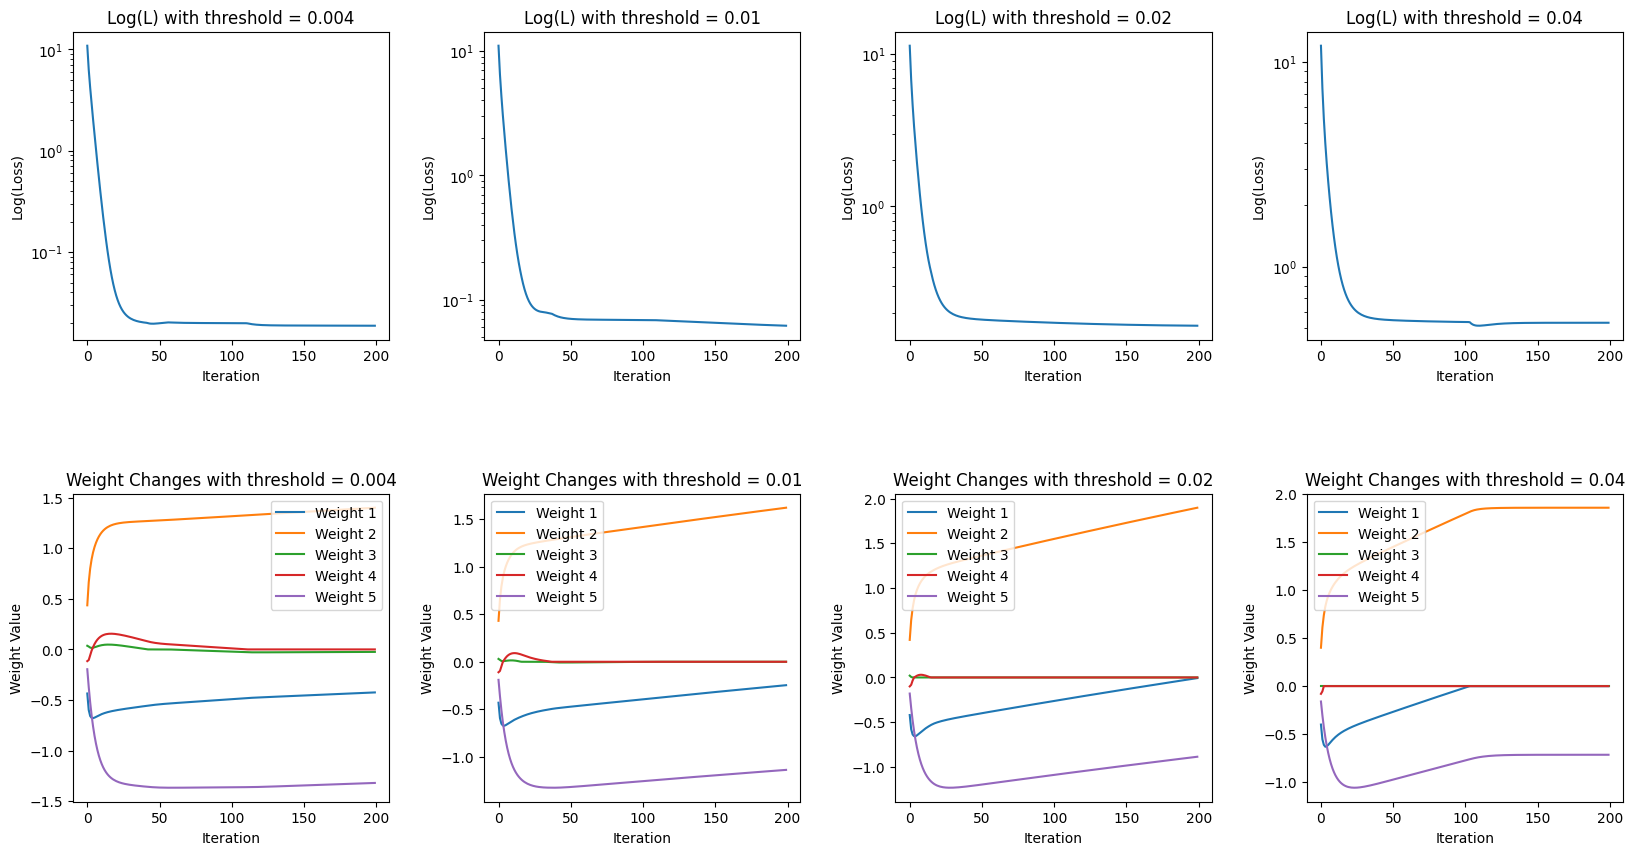

In [6]:
# Learning rate
mu = 0.02

# Define the thresholds for soft thresholding
thresholds = [0.004, 0.01, 0.02, 0.04]

# Soft thresholding function
def soft_threshold(W, thresh):
    return np.sign(W) * np.maximum(0, np.abs(W) - thresh)

# Function to compute the gradient of the loss without the regularization term
def compute_gradient(X, y, W):
    residuals = X.dot(W) - y.reshape(-1, 1)
    gradient = 2 * X.T.dot(residuals)
    return gradient

# Prepare to plot
fig, axes = plt.subplots(2, len(thresholds), figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Perform proximal gradient descent for each threshold
for index, thresh in enumerate(thresholds):
    W_prox = np.zeros((5, 1))
    losses_prox = []
    weight_history_prox = np.zeros((200, 5))

    # Run proximal gradient descent for 200 steps
    for step in range(200):
        gradient = compute_gradient(X, y, W_prox)
        W_prox -= mu * gradient  # Gradient step
        W_prox = soft_threshold(W_prox, thresh)  # Proximal step
        loss = np.sum((X.dot(W_prox) - y.reshape(-1, 1))**2) + thresh * np.sum(np.abs(W_prox))
        losses_prox.append(loss)
        weight_history_prox[step, :] = W_prox.ravel()

    # Plot log(L) for current threshold
    axes[0, index].plot(losses_prox)
    axes[0, index].set_yscale('log')
    axes[0, index].set_title(f'Log(L) with threshold = {thresh}')
    axes[0, index].set_xlabel('Iteration')
    axes[0, index].set_ylabel('Log(Loss)')

    # Plot weight changes for current threshold
    for i in range(5):
        axes[1, index].plot(weight_history_prox[:, i], label=f'Weight {i+1}')
    axes[1, index].set_title(f'Weight Changes with threshold = {thresh}')
    axes[1, index].set_xlabel('Iteration')
    axes[1, index].set_ylabel('Weight Value')
    axes[1, index].legend()

plt.show()

## f)
rimmed ℓ1 (Tℓ1) regularizer is proposed to solve the “bias” problem of ℓ1. For simplicity
you may implement the Tℓ1 regularizer as applying a ℓ1 regularization with strength λ on the 3
elements of W with the smallest absolute value, with no penalty on other elements. Minimize
L+λTℓ1(W) using proximal gradient update with λ = {1.0, 2.0, 5.0, 10.0} (correspond the soft
thresholding threshold {0.02, 0.04, 0.1, 0.2}). Plot the value of log(L) throughout the training,
and use another figure to plot the value of each element in W in each step. Comment on the
convergence comparison of the Trimmed ℓ1 and the ℓ1. Also compare the behavior of the early
steps (e.g. first 20) between the Trimmed ℓ1 and the iterative pruning.

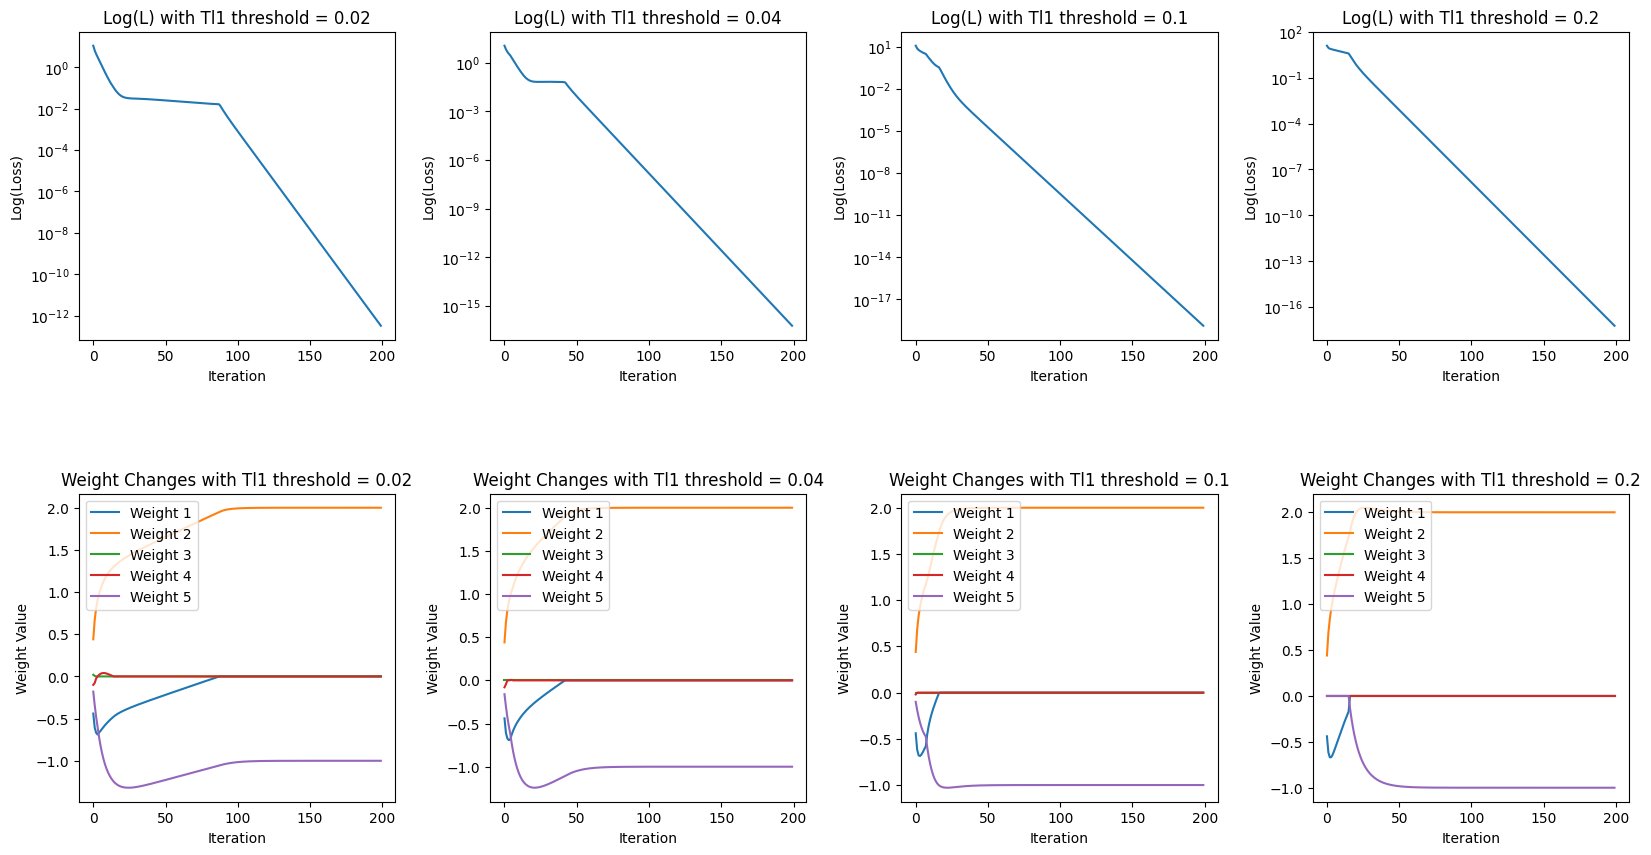

In [8]:
# Thresholds corresponding to lambda values for Tl1
thresholds = [0.02, 0.04, 0.1, 0.2]

# Modified soft thresholding function that only applies to the specified indices
def trimmed_soft_threshold(W, thresh, indices):
    W_new = W.copy()
    # Apply thresholding only to specified indices
    W_new[indices] = np.sign(W[indices]) * np.maximum(0, np.abs(W[indices]) - thresh)
    return W_new

# Function to compute the gradient of the loss without the regularization term
def compute_gradient(X, y, W):
    residuals = X.dot(W) - y.reshape(-1, 1)
    gradient = 2 * X.T.dot(residuals)
    return gradient

# Prepare to plot
fig, axes = plt.subplots(2, len(thresholds), figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Perform proximal gradient descent for each threshold
for index, thresh in enumerate(thresholds):
    W_tl1 = np.zeros((5, 1))
    losses_tl1 = []
    weight_history_tl1 = np.zeros((200, 5))

    # Run proximal gradient descent for 200 steps
    for step in range(200):
        gradient = compute_gradient(X, y, W_tl1)
        W_tl1 -= mu * gradient  # Gradient step
        # Determine the indices of the three smallest weights by absolute value for thresholding
        smallest_indices = np.argsort(np.abs(W_tl1), axis=0)[:3].flatten()
        W_tl1 = trimmed_soft_threshold(W_tl1, thresh, smallest_indices)  # Proximal step applying Tl1
        loss = np.sum((X.dot(W_tl1) - y.reshape(-1, 1))**2) + thresh * np.sum(np.abs(W_tl1[smallest_indices]))
        losses_tl1.append(loss)
        weight_history_tl1[step, :] = W_tl1.ravel()

    # Plot log(L) for current threshold
    axes[0, index].plot(losses_tl1)
    axes[0, index].set_yscale('log')
    axes[0, index].set_title(f'Log(L) with Tl1 threshold = {thresh}')
    axes[0, index].set_xlabel('Iteration')
    axes[0, index].set_ylabel('Log(Loss)')

    # Plot weight changes for current threshold
    for i in range(5):
        axes[1, index].plot(weight_history_tl1[:, i], label=f'Weight {i+1}')
    axes[1, index].set_title(f'Weight Changes with Tl1 threshold = {thresh}')
    axes[1, index].set_xlabel('Iteration')
    axes[1, index].set_ylabel('Weight Value')
    axes[1, index].legend()

plt.show()